# 다층 퍼셉트론 (MLP)
### CIFAR 데이터셋 대신 Kaggle에서 다운받은 Chessman image dataset을 사용했습니다.
### 데이터셋 다운로드 링크 : https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset

## 1. 데이터 준비

>### Data Info.
>#### Train Set : 422
>#### Validation Set : 109
>#### Classes : 6
>* Bishop
>* King
>* Knight
>* Pawn
>* Queen
>* Rook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils

In [2]:
import os
os.listdir("./Chess")

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [3]:
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [4]:
train_generator = data_generator.flow_from_directory(
    './Chess',
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale', # RGB 이미지를 그레이 스케일로 변환하여 1차원 데이터로 만들어 줍니다.
    subset='training')

Found 442 images belonging to 6 classes.


In [5]:
val_generator  = data_generator.flow_from_directory(
    './Chess',
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation')

Found 109 images belonging to 6 classes.


In [6]:
NUM_CLASSES = len(os.listdir("./Chess"))

[0. 1. 0. 0. 0. 0.]


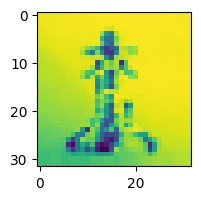

In [8]:
x_train, y_train = train_generator.next()
print(y_train[0])
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])
plt.show()

## 2. 모델 구축

In [9]:
input_layer = layers.Input((32, 32))

x = layers.Flatten()(input_layer)
x = layers.Dropout(0.2)(x)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 906       
Total params: 236,056
Trainable params: 236,056
Non-trainable params: 0
_______________________________________________________

In [10]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

## 3. 모델 학습

In [57]:
model.fit(train_generator, validation_data=val_generator, epochs=10, shuffle=True)

Epoch 1/10
7/7 [==============================] - 5s 816ms/step - loss: 1.2193 - accuracy: 0.5136 - val_loss: 1.7367 - val_accuracy: 0.3670
Epoch 2/10
7/7 [==============================] - 5s 682ms/step - loss: 1.2150 - accuracy: 0.5226 - val_loss: 1.7744 - val_accuracy: 0.3119
Epoch 3/10
7/7 [==============================] - 5s 681ms/step - loss: 1.1968 - accuracy: 0.5271 - val_loss: 1.8511 - val_accuracy: 0.3211
Epoch 4/10
7/7 [==============================] - 5s 714ms/step - loss: 1.2316 - accuracy: 0.5090 - val_loss: 1.7704 - val_accuracy: 0.3853
Epoch 5/10
7/7 [==============================] - 5s 693ms/step - loss: 1.2095 - accuracy: 0.5158 - val_loss: 1.7266 - val_accuracy: 0.3761
Epoch 6/10
7/7 [==============================] - 5s 708ms/step - loss: 1.2276 - accuracy: 0.5068 - val_loss: 1.8612 - val_accuracy: 0.3211
Epoch 7/10
7/7 [==============================] - 5s 706ms/step - loss: 1.1801 - accuracy: 0.5407 - val_loss: 1.8143 - val_accuracy: 0.3303
Epoch 8/10
7/7 [====

## 4. 평가

In [58]:
eva = model.evaluate(val_generator)

2/2 [==============================] - 2s 371ms/step - loss: 1.7813 - accuracy: 0.3853


In [59]:
# 제너레이터 안에 있는 데이터 추출하기
x_test = []
y_test = []
for i, data in enumerate(val_generator):
    x_test.append(data[0])
    y_test.append(data[1])
    if i == 1:
        break

In [60]:
x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [61]:
CLASSES = np.array(
    [
        "Bishop",
        "King",
        "Knight",
        "Pawn",
        "Queen",
        "Rook",
    ]
)

preds = model.predict(val_generator)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

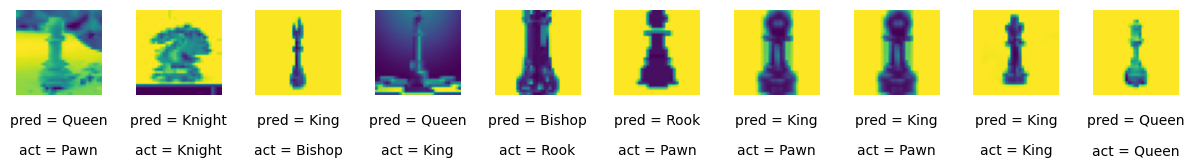

In [62]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

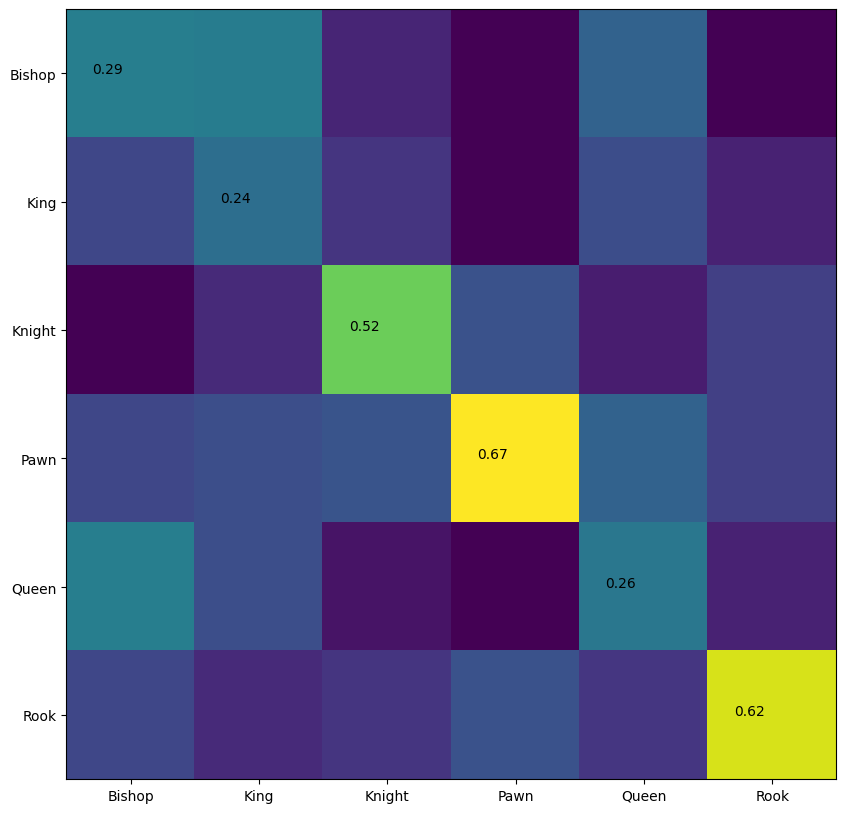

In [63]:
# 혼잡행렬 확인
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_true=np.argmax(y_test, axis=-1), y_pred=np.argmax(preds, axis=-1), normalize='pred')

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(con_matrix)
ax.set_xticks(np.arange(len(CLASSES)))
ax.set_xticklabels(CLASSES)
ax.set_yticks(np.arange(len(CLASSES)))
ax.set_yticklabels(CLASSES)
for i in range(len(CLASSES)):
  ax.text(-0.3+i,i, str(round(con_matrix[i,i],2)),fontsize=10, color='k')

- Knight, Pawn, Rook 라벨은 잘 분류되는 편인데에 반해 Bishop, King, Queen은 분류가 잘 되지 앟는 듯한 경향을 보입니다.
- 실제 이미지를 살펴보면 Bishop, King, Queen의 이미지는 모두 비슷하게 생긴 반면에 Knight, Pawn, Rook은 뚜렷한 특징을 가지고 있다는 것을 알 수 있습니다.